In [16]:
import pandas as pd

# 文件路径
input_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list.csv"
output_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned.csv"

# 加载数据
anime_data = pd.read_csv(input_path)

# 定义要保留的列
columns_to_keep = [
    "title", "score", "Synopsis", "Producers", "Studios", 
    "rank", "popularity", "favorites", "scored_by", "members", 
    "anime_id"
]

# 创建一个新列 'gen'，汇总不为空的 'Genres' 和 'genre' 列的内容
anime_data['gen'] = anime_data.apply(
    lambda row: ','.join(sorted(set(
        # 合并'Genres'和'genre'列的内容，并去除重复值
        (row['Genres'].split(',') if pd.notnull(row['Genres']) else []) + 
        (row['genre'].split(',') if pd.notnull(row['genre']) else [])
    ))), axis=1
)

# 删除原来的 'Genres' 和 'genre' 列
anime_data_cleaned = anime_data.drop(columns=['Genres', 'genre'])

# 保留指定的列，并包含新创建的 'gen' 列
anime_data_cleaned = anime_data_cleaned[columns_to_keep + ['gen']]

# 保存清理后的数据到新的CSV文件
anime_data_cleaned.to_csv(output_path, index=False)



In [20]:
import pandas as pd
import numpy as np

# 假设您的数据集存储在以下路径
anime_data = pd.read_csv('C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned.csv')

# 将所有列名转换为小写
anime_data.columns = [col.lower() for col in anime_data.columns]

# 删除重复的列
anime_data_cleaned = anime_data.loc[:, ~anime_data.columns.duplicated()]

# 计算每一列中空值和"unknown"或"unknowns"（不区分大小写）值的数量
nulls_and_unknowns = anime_data_cleaned.isnull().sum().to_frame(name='nulls')

# 创建一个函数来计算每个单元格中 "unknown" 或 "unknowns"（不区分大小写）的数量
def count_unknowns(cell):
    if isinstance(cell, str):
        lower_cell = cell.lower()
        if 'unknown' in lower_cell or 'unknowns' in lower_cell:
            return 1
    return 0

# 应用该函数并计算每列中 "unknown" 或 "unknowns" 的总数
unknown_counts = anime_data_cleaned.applymap(count_unknowns).sum()

# 将 "unknown" 和 "unknowns" 计数添加到结果 DataFrame
nulls_and_unknowns['unknowns'] = unknown_counts

nulls_and_unknowns



C:\Users\15023\AppData\Local\Temp\ipykernel_18544\1159773207.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unknown_counts = anime_data_cleaned.applymap(count_unknowns).sum()


,nulls,unknowns
title,0,0
score,0,0
synopsis,0,172
producers,0,4918
studios,0,3535
rank,1334,0
popularity,0,0
favorites,0,0
scored_by,0,0
members,0,0


In [26]:
import pandas as pd
import numpy as np
#处理 unknown 以及 rank null



# 加载数据
anime_data = pd.read_csv("C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned.csv")

# **处理 unknown 值**
# synopsis: 填充缺失值为 "No synopsis available."
anime_data['Synopsis'] = anime_data['Synopsis'].fillna("No Synopsis available.")

# producers 和 studios: 替换 "unknown" 为 "Not specified"
anime_data['Producers'] = anime_data['Producers'].replace("unknown", "Not specified")
anime_data['Studios'] = anime_data['Studios'].replace("unknown", "Not specified")

# genres: 替换 "unknown" 为 "Other"（可以转换为列表格式）
anime_data['gen'] = anime_data['gen'].fillna("Other").apply(lambda x: x.split(", ") if isinstance(x, str) else ["Other"])

# **处理 null 值**
# rank: 用中位数填充
anime_data['rank'] = anime_data['rank'].fillna(anime_data['rank'].median())

# 验证清理后的数据
print(anime_data.isnull().sum())
print(anime_data.head())

# 保存清理后的数据
anime_data.to_csv("C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_2nd.csv", index=False)


title         0
score         0
Synopsis      0
Producers     0
Studios       0
rank          0
popularity    0
favorites     0
scored_by     0
members       0
anime_id      0
gen           0
dtype: int64
                             title  score  \
0                     Cowboy Bebop   8.81   
1  Cowboy Bebop: Tengoku no Tobira   8.41   
2                           Trigun   8.31   
3               Witch Hunter Robin   7.34   
4                     Eyeshield 21   8.05   

                                            Synopsis  \
0  Crime is timeless. By the year 2071, humanity ...   
1  Another day, another bounty—such is the life o...   
2  Vash the Stampede is the man with a $$60,000,0...   
3  Robin Sena is a powerful craft user drafted in...   
4  Shy, reserved, and small-statured, Deimon High...   

                                           Producers   Studios    rank  \
0                                      Bandai Visual   Sunrise    27.0   
1                             Sunrise, 

In [27]:
#数值型特征：score, rank, popularity, favorites, scored_by, members 都需要是数值型，并没有缺失值

import pandas as pd

# 加载数据
anime_data = pd.read_csv("C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_2nd.csv")

# 数值型特征列表
numeric_features = ['score', 'rank', 'popularity', 'favorites', 'scored_by', 'members']

# 检查每列是否为数值型并且没有缺失值
def check_numeric_features(df, features):
    for feature in features:
        print(f"Checking feature: {feature}")
        # 检查是否为数值型
        if not pd.api.types.is_numeric_dtype(df[feature]):
            print(f"\u2716 {feature} is not numeric.")
        else:
            print(f"\u2714 {feature} is numeric.")
        # 检查是否有缺失值
        missing_count = df[feature].isnull().sum()
        if missing_count > 0:
            print(f"\u2716 {feature} has {missing_count} missing values.")
        else:
            print(f"\u2714 {feature} has no missing values.")
        print("---")

# 执行检查
check_numeric_features(anime_data, numeric_features)

Checking feature: score
✔ score is numeric.
✔ score has no missing values.
---
Checking feature: rank
✔ rank is numeric.
✔ rank has no missing values.
---
Checking feature: popularity
✔ popularity is numeric.
✔ popularity has no missing values.
---
Checking feature: favorites
✔ favorites is numeric.
✔ favorites has no missing values.
---
Checking feature: scored_by
✔ scored_by is numeric.
✔ scored_by has no missing values.
---
Checking feature: members
✔ members is numeric.
✔ members has no missing values.
---


In [29]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
#文本型特征 以及 类别型 特征预处理
# 加载数据
input_file = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_2nd.csv"
output_file = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd.csv"

anime_data = pd.read_csv(input_file)

# **1. 文本型特征处理**
# 使用 SentenceTransformer 生成嵌入
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert `synopsis`, `producers`, `studios` into embeddings
anime_data['synopsis_embedding'] = anime_data['Synopsis'].apply(
    lambda x: embedding_model.encode(x) if isinstance(x, str) else np.zeros(384)
)
anime_data['producers_embedding'] = anime_data['Producers'].apply(
    lambda x: embedding_model.encode(x) if isinstance(x, str) else np.zeros(384)
)
anime_data['studios_embedding'] = anime_data['Studios'].apply(
    lambda x: embedding_model.encode(x) if isinstance(x, str) else np.zeros(384)
)

# **2. 类别型特征处理**
# 将 `gen` 转换为多热编码
anime_data['gen_list'] = anime_data['gen'].apply(
    lambda x: x.split(",") if isinstance(x, str) else []
)
mlb = MultiLabelBinarizer()
gen_encoded = mlb.fit_transform(anime_data['gen_list'])
gen_encoded_df = pd.DataFrame(gen_encoded, columns=mlb.classes_)

# 将编码结果合并回主表
anime_data = pd.concat([anime_data, gen_encoded_df], axis=1)

# 删除原始列（可选）
anime_data.drop(columns=['gen', 'gen_list'], inplace=True)

# 保存处理后的数据
anime_data.to_csv(output_file, index=False)


e:\anaconda\envs\pytorch\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [31]:
#数值特征归一化

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 加载数据
anime_data = pd.read_csv("C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd.csv")

# **1. `score` 无需归一化**

# **2. `rank` 归一化 (Min-Max Scaling)**
scaler = MinMaxScaler()
anime_data['rank_normalized'] = scaler.fit_transform(anime_data[['rank']])

# **3. 对 `popularity`, `favorites`, `scored_by`, `members` 进行对数变换**
anime_data['popularity_log'] = np.log1p(anime_data['popularity'])
anime_data['favorites_log'] = np.log1p(anime_data['favorites'])
anime_data['scored_by_log'] = np.log1p(anime_data['scored_by'])
anime_data['members_log'] = np.log1p(anime_data['members'])

# 检查归一化结果
print(anime_data[['rank', 'rank_normalized', 'popularity_log', 'favorites_log', 'scored_by_log', 'members_log']].head())

# 保存归一化后的数据
anime_data.to_csv("C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd_normal.csv", index=False)



     rank  rank_normalized  popularity_log  favorites_log  scored_by_log  \
0    27.0         0.002090        3.663562      10.575054      12.808929   
1   157.0         0.012154        6.084499       6.561031      11.620389   
2   234.0         0.018114        4.934474       9.189729      12.195234   
3  2292.0         0.177427        7.007601       6.263398      10.370643   
4   487.0         0.037699        6.700731       7.409136      10.796018   

   members_log  
0    13.469880  
1    12.102083  
2    12.831685  
3    11.225483  
4    11.577954  


In [2]:
try:
    import lightgbm as lgb
    print("LightGBM版本:", lgb.__version__)
except ModuleNotFoundError:
    print("LightGBM未安装。")


LightGBM版本: 4.5.0


Missing values in numeric columns:
scored_by_log      0
rank_normalized    0
popularity_log     0
favorites_log      0
scored_by          0
members_log        0
dtype: int64

Outliers in numeric columns:
{'scored_by_log': 0, 'rank_normalized': 0, 'popularity_log': 657, 'favorites_log': 253, 'scored_by': 2152, 'members_log': 3}

Plotting distributions...


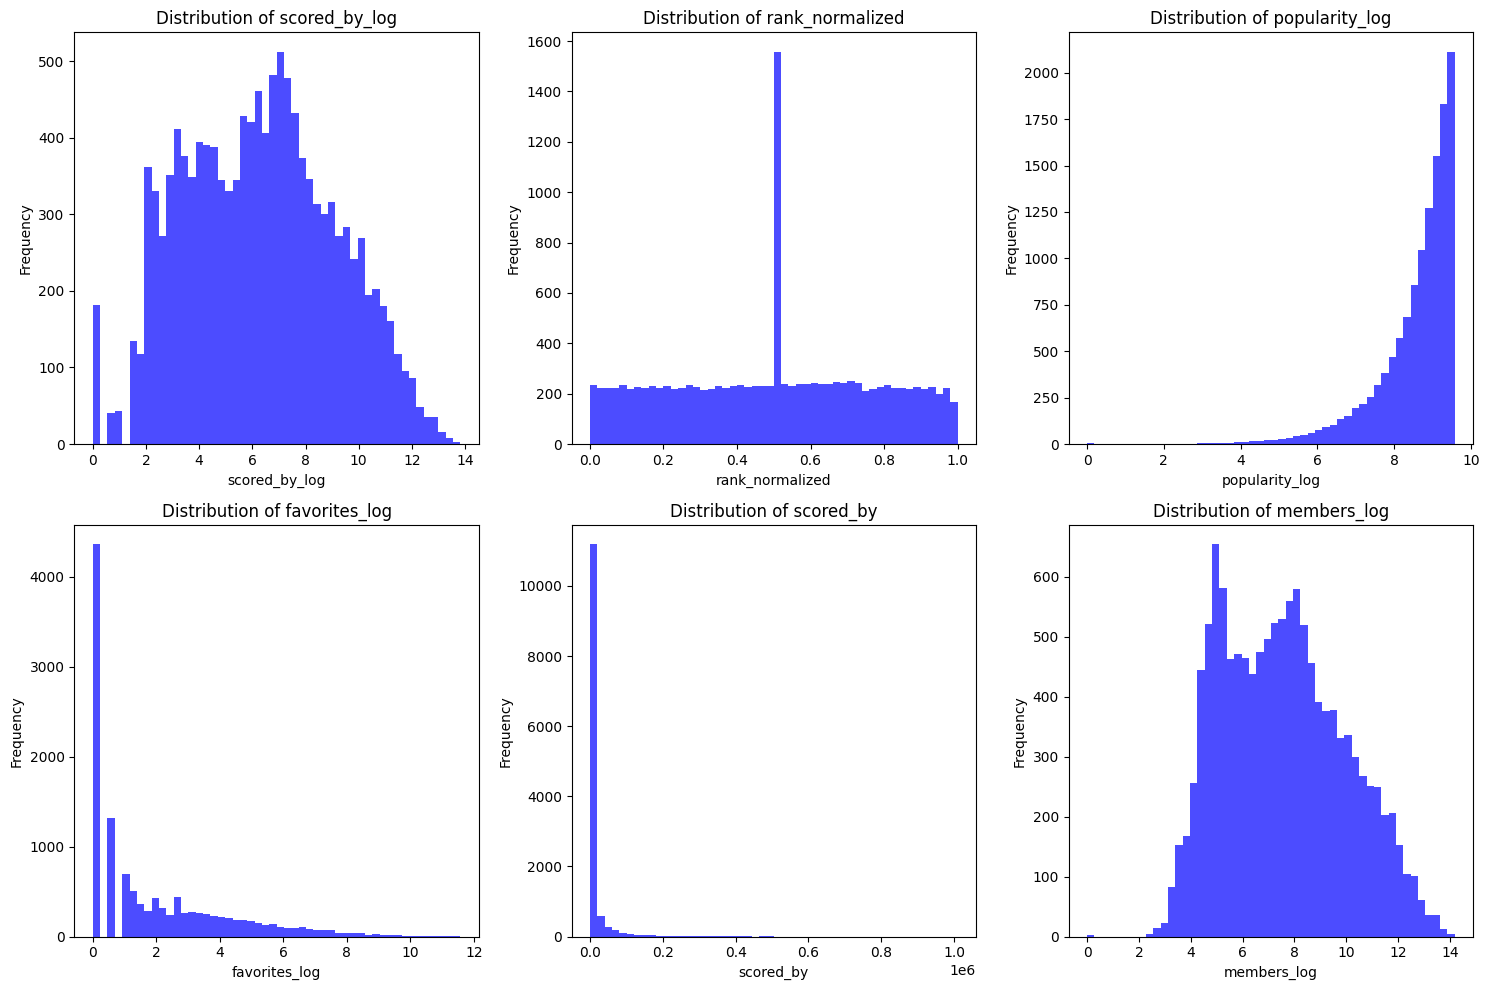

In [32]:
#检查数值特征 是否合适的归一化

import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
file_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd_normal.csv"
anime_data = pd.read_csv(file_path)

# 数值型列
numeric_columns = ['scored_by_log', 'rank_normalized', 'popularity_log', 'favorites_log', 'scored_by', 'members_log']

# 检查每列的分布情况
def plot_distribution(data, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i + 1)
        plt.hist(data[col].dropna(), bins=50, color='blue', alpha=0.7)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 检查是否有缺失值
missing_values = anime_data[numeric_columns].isnull().sum()

# 检查是否存在异常值
outliers = {}
for col in numeric_columns:
    Q1 = anime_data[col].quantile(0.25)
    Q3 = anime_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = anime_data[(anime_data[col] < lower_bound) | (anime_data[col] > upper_bound)].shape[0]

# 输出检测结果
print("Missing values in numeric columns:")
print(missing_values)
print("\nOutliers in numeric columns:")
print(outliers)

# 绘制分布图
print("\nPlotting distributions...")
plot_distribution(anime_data, numeric_columns)

In [36]:
import pandas as pd

# 读取上传的CSV文件
file_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd_normal.csv"
anime_data = pd.read_csv(file_path)

# 选择合适的列
selected_columns = [
    "anime_id",  # 用于与用户数据匹配
    "score", 
    "rank_normalized", 
    "popularity_log", 
    "favorites_log", 
    "scored_by_log", 
    "members_log"
]

# 如果需要包括标签的one-hot编码，也可以加上相应的列名
# selected_columns.extend(['Action', 'Comedy', ...])

# 提取这些列
filtered_data = anime_data[selected_columns]

# 检查提取后的数据
print(filtered_data.head())

# 保存新的数据集
filtered_data.to_csv("C:/Users/15023/Desktop/IR/Project/user_data/filtered_anime_data_for_merge.csv", index=False)


   anime_id  score  rank_normalized  popularity_log  favorites_log  \
0         1   8.81         0.002090        3.663562      10.575054   
1         5   8.41         0.012154        6.084499       6.561031   
2         6   8.31         0.018114        4.934474       9.189729   
3         7   7.34         0.177427        7.007601       6.263398   
4        15   8.05         0.037699        6.700731       7.409136   

   scored_by_log  members_log  
0      12.808929    13.469880  
1      11.620389    12.102083  
2      12.195234    12.831685  
3      10.370643    11.225483  
4      10.796018    11.577954  


In [37]:
#生成用来训练的merged data

import pandas as pd

# 加载提取的静态特征数据
filtered_anime_data = pd.read_csv("C:/Users/15023/Desktop/IR/Project/user_data/filtered_anime_data_for_merge.csv")

# 加载用户评分数据
user_data_path = "C:/Users/15023/Desktop/IR/Project/user_data/UserAnimeList.csv"
user_data = pd.read_csv(user_data_path)

# 合并数据集
merged_data = pd.merge(user_data, filtered_anime_data, how="inner", on="anime_id")

# 检查合并后的数据
print(merged_data.head())

# 保存合并后的数据
merged_data.to_csv("C:/Users/15023/Desktop/IR/Project/user_data/Merged_User_Anime_Data.csv", index=False)


   username  anime_id  my_watched_episodes my_start_date my_finish_date  \
0  karthiga        21                  586    0000-00-00     0000-00-00   
1  karthiga        59                   26    0000-00-00     0000-00-00   
2  karthiga        74                   26    0000-00-00     0000-00-00   
3  karthiga       120                   26    0000-00-00     0000-00-00   
4  karthiga       178                   26    0000-00-00     0000-00-00   

   my_score  my_status  my_rewatching  my_rewatching_ep  my_last_updated  \
0         9          1            NaN                 0       1362307973   
1         7          2            NaN                 0       1362923691   
2         7          2            NaN                 0       1367081015   
3         7          2            NaN                 0       1362308037   
4         7          2            0.0                 0       1364399953   

  my_tags  score  rank_normalized  popularity_log  favorites_log  \
0     NaN   8.54        

In [41]:
import pandas as pd
#to pkl file


import pandas as pd

# 定义分块大小
chunksize = 100000  # 每次处理 100,000 行

# 定义输入和输出文件路径
merged_data_path = "C:/Users/15023/Desktop/IR/Project/user_data/Merged_User_Anime_Data.csv"
pkl_path = "C:/Users/15023/Desktop/IR/Project/user_data/Merged_User_Anime_Data.pkl"

# 分块读取并逐块保存到 .pkl 文件
for i, chunk in enumerate(pd.read_csv(merged_data_path, chunksize=chunksize)):
    if i == 0:
        # 第一次创建文件
        chunk.to_pickle(pkl_path)
    else:
        # 后续分块追加到已有的 .pkl 文件
        with open(pkl_path, "ab") as f:
            chunk.to_pickle(f)

print(f"Merged data has been successfully saved to {pkl_path}")




C:\Users\15023\AppData\Local\Temp\ipykernel_18544\267059916.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(merged_data_path, chunksize=chunksize)):
C:\Users\15023\AppData\Local\Temp\ipykernel_18544\267059916.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(merged_data_path, chunksize=chunksize)):
C:\Users\15023\AppData\Local\Temp\ipykernel_18544\267059916.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(merged_data_path, chunksize=chunksize)):
C:\Users\15023\AppData\Local\Temp\ipykernel_18544\267059916.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(merged_data_path, chunksize=chunksize)):
C:\U

Merged data has been successfully saved to C:/Users/15023/Desktop/IR/Project/user_data/Merged_User_Anime_Data.pkl


In [42]:
#开始训练，检查pkl文件

# 读取保存的 pkl 文件
data_path = "C:/Users/15023/Desktop/IR/Project/user_data/Merged_User_Anime_Data.pkl"
data = pd.read_pickle(data_path)

# 检查数据格式
print(data.head())


   username  anime_id  my_watched_episodes my_start_date my_finish_date  \
0  karthiga        21                  586    0000-00-00     0000-00-00   
1  karthiga        59                   26    0000-00-00     0000-00-00   
2  karthiga        74                   26    0000-00-00     0000-00-00   
3  karthiga       120                   26    0000-00-00     0000-00-00   
4  karthiga       178                   26    0000-00-00     0000-00-00   

   my_score  my_status  my_rewatching  my_rewatching_ep  my_last_updated  \
0         9          1            NaN                 0       1362307973   
1         7          2            NaN                 0       1362923691   
2         7          2            NaN                 0       1367081015   
3         7          2            NaN                 0       1362308037   
4         7          2            0.0                 0       1364399953   

  my_tags  score  rank_normalized  popularity_log  favorites_log  \
0     NaN   8.54        

In [21]:


#训练数据 划分以及检查 format

import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# 读取保存的 pkl 文件
data_path = "C:/Users/15023/Desktop/IR/Project/user_data/Merged_User_Anime_Data.pkl"
data = pd.read_pickle(data_path)

# 定义特征列和目标列
features = ["score", "rank_normalized", "popularity_log", "favorites_log", "scored_by_log", "members_log"]

import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# 限制每组的最大样本数
max_group_size = 10000

# 对分组进行裁剪
data_grouped = data.groupby("username").apply(
    lambda x: x.head(max_group_size) if len(x) > max_group_size else x
).reset_index(drop=True)

# 更新特征和标签
features = ["score", "rank_normalized", "popularity_log", "favorites_log", "scored_by_log", "members_log"]
X = data_grouped[features]  # 特征
y = data_grouped["my_score"]  # 标签

# 更新分组信息
data_grouped["group"] = data_grouped["username"].astype("category").cat.codes
groups = data_grouped.groupby("group").size().values

# 检查分组和数据一致性
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique groups (after trimming): {data_grouped['group'].nunique()}")
print(f"Groups sum (total rows): {groups.sum()}, Data rows: {len(X)}")

# 数据集划分
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=data_grouped["group"]))

# 按索引划分数据集
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# 针对训练集和测试集重新生成分组信息
groups_train = data_grouped.iloc[train_idx].groupby("group").size().values
groups_test = data_grouped.iloc[test_idx].groupby("group").size().values

# 确保分组一致性
assert groups_train.sum() == len(X_train), f"Groups_train sum {groups_train.sum()} does not match training data length {len(X_train)}"
assert groups_test.sum() == len(X_test), f"Groups_test sum {groups_test.sum()} does not match test data length {len(X_test)}"

# 检查划分结果
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")
print(f"Training groups size: {len(groups_train)}, Test groups size: {len(groups_test)}")
print(f"Training groups sum: {groups_train.sum()}, Test groups sum: {groups_test.sum()}")



Features shape: (97334, 6)
Labels shape: (97334,)
Unique groups (after trimming): 310
Groups sum (total rows): 97334, Data rows: 97334
Training set size: (79229, 6), Test set size: (18105, 6)
Training groups size: 248, Test groups size: 62
Training groups sum: 79229, Test groups sum: 18105


C:\Users\15023\AppData\Local\Temp\ipykernel_359176\1301847229.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_grouped = data.groupby("username").apply(


[I 2024-12-12 04:30:24,656] A new study created in memory with name: no-name-8cf8c65a-d147-4841-b3ca-50555527e177


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.536602	test's ndcg@10: 0.550126


[I 2024-12-12 04:30:25,056] Trial 0 finished with value: 0.5594071381024125 and parameters: {'learning_rate': 0.0015240368325480295, 'num_leaves': 79, 'min_data_in_leaf': 40, 'max_depth': 7, 'feature_fraction': 0.6456601236508803, 'bagging_fraction': 0.8134610517895193, 'bagging_freq': 8}. Best is trial 0 with value: 0.5594071381024125.


[20]	train's ndcg@10: 0.542202	test's ndcg@10: 0.556305
Early stopping, best iteration is:
[17]	train's ndcg@10: 0.537639	test's ndcg@10: 0.559407
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.528871	test's ndcg@10: 0.548663
[20]	train's ndcg@10: 0.535087	test's ndcg@10: 0.553339
[30]	train's ndcg@10: 0.536239	test's ndcg@10: 0.560282


[I 2024-12-12 04:30:25,461] Trial 1 finished with value: 0.5671696502501137 and parameters: {'learning_rate': 0.019755613816473422, 'num_leaves': 19, 'min_data_in_leaf': 24, 'max_depth': 8, 'feature_fraction': 0.7079050570694735, 'bagging_fraction': 0.682807881190746, 'bagging_freq': 3}. Best is trial 1 with value: 0.5671696502501137.


[40]	train's ndcg@10: 0.538048	test's ndcg@10: 0.561564
Early stopping, best iteration is:
[33]	train's ndcg@10: 0.537989	test's ndcg@10: 0.56717
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.525533	test's ndcg@10: 0.551361


[I 2024-12-12 04:30:25,706] Trial 2 finished with value: 0.5540608998315789 and parameters: {'learning_rate': 0.0034871699293900745, 'num_leaves': 18, 'min_data_in_leaf': 21, 'max_depth': 5, 'feature_fraction': 0.997062877610588, 'bagging_fraction': 0.9000164536476236, 'bagging_freq': 7}. Best is trial 1 with value: 0.5671696502501137.


[20]	train's ndcg@10: 0.529447	test's ndcg@10: 0.552798
Early stopping, best iteration is:
[15]	train's ndcg@10: 0.52451	test's ndcg@10: 0.554061
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.537358	test's ndcg@10: 0.548369
Early stopping, best iteration is:
[2]	train's ndcg@10: 0.525221	test's ndcg@10: 0.562633


[I 2024-12-12 04:30:25,851] Trial 3 finished with value: 0.5626326848767742 and parameters: {'learning_rate': 0.04123691043427655, 'num_leaves': 30, 'min_data_in_leaf': 28, 'max_depth': 10, 'feature_fraction': 0.7373624080417095, 'bagging_fraction': 0.8650635710635902, 'bagging_freq': 5}. Best is trial 1 with value: 0.5671696502501137.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.535926	test's ndcg@10: 0.542186
[20]	train's ndcg@10: 0.538957	test's ndcg@10: 0.543094


[I 2024-12-12 04:30:26,220] Trial 4 finished with value: 0.5471513547137081 and parameters: {'learning_rate': 0.002036575821067691, 'num_leaves': 106, 'min_data_in_leaf': 6, 'max_depth': 7, 'feature_fraction': 0.667484184844802, 'bagging_fraction': 0.750546612413289, 'bagging_freq': 7}. Best is trial 1 with value: 0.5671696502501137.


[30]	train's ndcg@10: 0.541507	test's ndcg@10: 0.544014
Early stopping, best iteration is:
[24]	train's ndcg@10: 0.542716	test's ndcg@10: 0.547151
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.536728	test's ndcg@10: 0.547206


[I 2024-12-12 04:30:26,504] Trial 5 finished with value: 0.5497006525250714 and parameters: {'learning_rate': 0.009065029776004362, 'num_leaves': 101, 'min_data_in_leaf': 7, 'max_depth': 6, 'feature_fraction': 0.9935738229019611, 'bagging_fraction': 0.6560403811241811, 'bagging_freq': 7}. Best is trial 1 with value: 0.5671696502501137.


[20]	train's ndcg@10: 0.539597	test's ndcg@10: 0.54531
Early stopping, best iteration is:
[18]	train's ndcg@10: 0.539023	test's ndcg@10: 0.549701
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.514981	test's ndcg@10: 0.547592
Early stopping, best iteration is:
[2]	train's ndcg@10: 0.509417	test's ndcg@10: 0.551585


[I 2024-12-12 04:30:26,641] Trial 6 finished with value: 0.551584607167554 and parameters: {'learning_rate': 0.0011861112099444374, 'num_leaves': 104, 'min_data_in_leaf': 17, 'max_depth': 4, 'feature_fraction': 0.9319050096735632, 'bagging_fraction': 0.8453360230491234, 'bagging_freq': 7}. Best is trial 1 with value: 0.5671696502501137.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.537149	test's ndcg@10: 0.546087
[20]	train's ndcg@10: 0.536079	test's ndcg@10: 0.563753


[I 2024-12-12 04:30:26,959] Trial 7 finished with value: 0.5660392228375097 and parameters: {'learning_rate': 0.00229174512679555, 'num_leaves': 96, 'min_data_in_leaf': 46, 'max_depth': 6, 'feature_fraction': 0.9271893308378163, 'bagging_fraction': 0.6005869824110983, 'bagging_freq': 6}. Best is trial 1 with value: 0.5671696502501137.


[30]	train's ndcg@10: 0.537751	test's ndcg@10: 0.560193
Early stopping, best iteration is:
[21]	train's ndcg@10: 0.538008	test's ndcg@10: 0.566039
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:27,279] Trial 8 finished with value: 0.5604544735497907 and parameters: {'learning_rate': 0.006078727554609479, 'num_leaves': 122, 'min_data_in_leaf': 39, 'max_depth': 10, 'feature_fraction': 0.7721663063201348, 'bagging_fraction': 0.9674955912605591, 'bagging_freq': 1}. Best is trial 1 with value: 0.5671696502501137.


[10]	train's ndcg@10: 0.545411	test's ndcg@10: 0.554243
[20]	train's ndcg@10: 0.547009	test's ndcg@10: 0.559148
Early stopping, best iteration is:
[12]	train's ndcg@10: 0.548417	test's ndcg@10: 0.560454
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:27,578] Trial 9 finished with value: 0.5670707225183695 and parameters: {'learning_rate': 0.07574899630770177, 'num_leaves': 31, 'min_data_in_leaf': 38, 'max_depth': 7, 'feature_fraction': 0.6689151391764575, 'bagging_fraction': 0.6721079661866155, 'bagging_freq': 3}. Best is trial 1 with value: 0.5671696502501137.


[10]	train's ndcg@10: 0.544505	test's ndcg@10: 0.555077
[20]	train's ndcg@10: 0.545504	test's ndcg@10: 0.563277
Early stopping, best iteration is:
[17]	train's ndcg@10: 0.543748	test's ndcg@10: 0.567071
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.539265	test's ndcg@10: 0.545367
[20]	train's ndcg@10: 0.545676	test's ndcg@10: 0.561528


[I 2024-12-12 04:30:28,012] Trial 10 finished with value: 0.5616203162554982 and parameters: {'learning_rate': 0.03082460393195987, 'num_leaves': 54, 'min_data_in_leaf': 26, 'max_depth': 9, 'feature_fraction': 0.8323155862522714, 'bagging_fraction': 0.7391840708742233, 'bagging_freq': 10}. Best is trial 1 with value: 0.5671696502501137.


[30]	train's ndcg@10: 0.547378	test's ndcg@10: 0.559028
Early stopping, best iteration is:
[26]	train's ndcg@10: 0.548014	test's ndcg@10: 0.56162
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:28,301] Trial 11 finished with value: 0.5605932643485371 and parameters: {'learning_rate': 0.09621717881139727, 'num_leaves': 44, 'min_data_in_leaf': 35, 'max_depth': 8, 'feature_fraction': 0.6095132832067559, 'bagging_fraction': 0.6946750518202791, 'bagging_freq': 3}. Best is trial 1 with value: 0.5671696502501137.


[10]	train's ndcg@10: 0.547465	test's ndcg@10: 0.557385
[20]	train's ndcg@10: 0.548743	test's ndcg@10: 0.552293
Early stopping, best iteration is:
[11]	train's ndcg@10: 0.5494	test's ndcg@10: 0.560593
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:28,636] Trial 12 finished with value: 0.5559260988297647 and parameters: {'learning_rate': 0.023137383245143892, 'num_leaves': 18, 'min_data_in_leaf': 29, 'max_depth': 8, 'feature_fraction': 0.7068428355373081, 'bagging_fraction': 0.6009523337899104, 'bagging_freq': 3}. Best is trial 1 with value: 0.5671696502501137.


[10]	train's ndcg@10: 0.53108	test's ndcg@10: 0.543761
[20]	train's ndcg@10: 0.538115	test's ndcg@10: 0.555926
[30]	train's ndcg@10: 0.539477	test's ndcg@10: 0.55426
Early stopping, best iteration is:
[20]	train's ndcg@10: 0.538115	test's ndcg@10: 0.555926


[I 2024-12-12 04:30:28,836] Trial 13 finished with value: 0.5481865878695976 and parameters: {'learning_rate': 0.09666487773705504, 'num_leaves': 54, 'min_data_in_leaf': 50, 'max_depth': 3, 'feature_fraction': 0.8227998316723119, 'bagging_fraction': 0.6823375194136995, 'bagging_freq': 3}. Best is trial 1 with value: 0.5671696502501137.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.524146	test's ndcg@10: 0.541677
Early stopping, best iteration is:
[4]	train's ndcg@10: 0.521977	test's ndcg@10: 0.548187
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.540401	test's ndcg@10: 0.549023
[20]	train's ndcg@10: 0.544326	test's ndcg@10: 0.557889


[I 2024-12-12 04:30:29,197] Trial 14 finished with value: 0.5627778453693548 and parameters: {'learning_rate': 0.01658444921076434, 'num_leaves': 37, 'min_data_in_leaf': 14, 'max_depth': 8, 'feature_fraction': 0.704828902540015, 'bagging_fraction': 0.7650602702204607, 'bagging_freq': 1}. Best is trial 1 with value: 0.5671696502501137.


Early stopping, best iteration is:
[18]	train's ndcg@10: 0.544824	test's ndcg@10: 0.562778
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.546182	test's ndcg@10: 0.543995


[I 2024-12-12 04:30:29,578] Trial 15 finished with value: 0.5536422636110232 and parameters: {'learning_rate': 0.05909484606795963, 'num_leaves': 71, 'min_data_in_leaf': 34, 'max_depth': 9, 'feature_fraction': 0.756378761614349, 'bagging_fraction': 0.6424958435163907, 'bagging_freq': 5}. Best is trial 1 with value: 0.5671696502501137.


[20]	train's ndcg@10: 0.549991	test's ndcg@10: 0.549353
[30]	train's ndcg@10: 0.549517	test's ndcg@10: 0.551637
Early stopping, best iteration is:
[22]	train's ndcg@10: 0.548096	test's ndcg@10: 0.553642
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:29,760] Trial 16 finished with value: 0.542529524869322 and parameters: {'learning_rate': 0.01302103144588987, 'num_leaves': 26, 'min_data_in_leaf': 22, 'max_depth': 5, 'feature_fraction': 0.6108685709810816, 'bagging_fraction': 0.7236532356322024, 'bagging_freq': 4}. Best is trial 1 with value: 0.5671696502501137.


[10]	train's ndcg@10: 0.532911	test's ndcg@10: 0.541703
Early stopping, best iteration is:
[1]	train's ndcg@10: 0.510015	test's ndcg@10: 0.54253
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.544961	test's ndcg@10: 0.555107


[I 2024-12-12 04:30:30,142] Trial 17 finished with value: 0.5631808776876738 and parameters: {'learning_rate': 0.05667186298235295, 'num_leaves': 48, 'min_data_in_leaf': 33, 'max_depth': 7, 'feature_fraction': 0.6633848293657808, 'bagging_fraction': 0.7979831175907873, 'bagging_freq': 2}. Best is trial 1 with value: 0.5671696502501137.


[20]	train's ndcg@10: 0.549284	test's ndcg@10: 0.56084
[30]	train's ndcg@10: 0.551356	test's ndcg@10: 0.559552
Early stopping, best iteration is:
[23]	train's ndcg@10: 0.550317	test's ndcg@10: 0.563181
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.540033	test's ndcg@10: 0.540653
[20]	train's ndcg@10: 0.543366	test's ndcg@10: 0.556736


[I 2024-12-12 04:30:30,471] Trial 18 finished with value: 0.5586710222693756 and parameters: {'learning_rate': 0.0054564523962765815, 'num_leaves': 66, 'min_data_in_leaf': 42, 'max_depth': 9, 'feature_fraction': 0.7071212935775951, 'bagging_fraction': 0.6562470366300149, 'bagging_freq': 4}. Best is trial 1 with value: 0.5671696502501137.


Early stopping, best iteration is:
[16]	train's ndcg@10: 0.543298	test's ndcg@10: 0.558671
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.536368	test's ndcg@10: 0.550008
[20]	train's ndcg@10: 0.536952	test's ndcg@10: 0.557646
[30]	train's ndcg@10: 0.541315	test's ndcg@10: 0.560564
[40]	train's ndcg@10: 0.541249	test's ndcg@10: 0.55855
Early stopping, best iteration is:
[31]	train's ndcg@10: 0.540813	test's ndcg@10: 0.561694


[I 2024-12-12 04:30:30,906] Trial 19 finished with value: 0.5616940153114816 and parameters: {'learning_rate': 0.021696782358187318, 'num_leaves': 33, 'min_data_in_leaf': 13, 'max_depth': 5, 'feature_fraction': 0.8661109995325068, 'bagging_fraction': 0.7128264758413285, 'bagging_freq': 2}. Best is trial 1 with value: 0.5671696502501137.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.536123	test's ndcg@10: 0.540318
[20]	train's ndcg@10: 0.54551	test's ndcg@10: 0.549079


[I 2024-12-12 04:30:31,281] Trial 20 finished with value: 0.5527298701800808 and parameters: {'learning_rate': 0.042192093076186106, 'num_leaves': 85, 'min_data_in_leaf': 24, 'max_depth': 6, 'feature_fraction': 0.7908643865174544, 'bagging_fraction': 0.7843501200766693, 'bagging_freq': 4}. Best is trial 1 with value: 0.5671696502501137.


Early stopping, best iteration is:
[16]	train's ndcg@10: 0.543891	test's ndcg@10: 0.55273
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.535497	test's ndcg@10: 0.554437
[20]	train's ndcg@10: 0.54078	test's ndcg@10: 0.564076
[30]	train's ndcg@10: 0.541076	test's ndcg@10: 0.565708
Early stopping, best iteration is:
[28]	train's ndcg@10: 0.540669	test's ndcg@10: 0.56977


[I 2024-12-12 04:30:31,728] Trial 21 finished with value: 0.5697703155648493 and parameters: {'learning_rate': 0.008759989599759153, 'num_leaves': 93, 'min_data_in_leaf': 50, 'max_depth': 6, 'feature_fraction': 0.9255868118263204, 'bagging_fraction': 0.6002894416647728, 'bagging_freq': 6}. Best is trial 21 with value: 0.5697703155648493.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.53746	test's ndcg@10: 0.542757
[20]	train's ndcg@10: 0.540559	test's ndcg@10: 0.549798
[30]	train's ndcg@10: 0.54352	test's ndcg@10: 0.547713
[40]	train's ndcg@10: 0.543509	test's ndcg@10: 0.549642
Early stopping, best iteration is:
[35]	train's ndcg@10: 0.543146	test's ndcg@10: 0.551662


[I 2024-12-12 04:30:32,374] Trial 22 finished with value: 0.551662023345003 and parameters: {'learning_rate': 0.008257912390462543, 'num_leaves': 124, 'min_data_in_leaf': 47, 'max_depth': 7, 'feature_fraction': 0.8818905556225308, 'bagging_fraction': 0.632724447719754, 'bagging_freq': 9}. Best is trial 21 with value: 0.5697703155648493.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.540965	test's ndcg@10: 0.553052
[20]	train's ndcg@10: 0.547201	test's ndcg@10: 0.56606
[30]	train's ndcg@10: 0.546773	test's ndcg@10: 0.566791
Early stopping, best iteration is:
[28]	train's ndcg@10: 0.548523	test's ndcg@10: 0.570618


[I 2024-12-12 04:30:32,907] Trial 23 finished with value: 0.5706178277088397 and parameters: {'learning_rate': 0.013705150021501142, 'num_leaves': 62, 'min_data_in_leaf': 44, 'max_depth': 8, 'feature_fraction': 0.737022534793367, 'bagging_fraction': 0.68299068522948, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.542814	test's ndcg@10: 0.546655
[20]	train's ndcg@10: 0.54616	test's ndcg@10: 0.541259


[I 2024-12-12 04:30:33,348] Trial 24 finished with value: 0.5544219406514448 and parameters: {'learning_rate': 0.013310124777212598, 'num_leaves': 87, 'min_data_in_leaf': 44, 'max_depth': 8, 'feature_fraction': 0.731233211838401, 'bagging_fraction': 0.624007618904849, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


[30]	train's ndcg@10: 0.54625	test's ndcg@10: 0.546251
Early stopping, best iteration is:
[25]	train's ndcg@10: 0.547064	test's ndcg@10: 0.554422
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.538244	test's ndcg@10: 0.551947
[20]	train's ndcg@10: 0.545402	test's ndcg@10: 0.557303
[30]	train's ndcg@10: 0.546735	test's ndcg@10: 0.552322


[I 2024-12-12 04:30:33,753] Trial 25 finished with value: 0.5620886757541691 and parameters: {'learning_rate': 0.004731233685257507, 'num_leaves': 67, 'min_data_in_leaf': 48, 'max_depth': 9, 'feature_fraction': 0.8072464259160271, 'bagging_fraction': 0.7047122285048725, 'bagging_freq': 5}. Best is trial 23 with value: 0.5706178277088397.


Early stopping, best iteration is:
[23]	train's ndcg@10: 0.546461	test's ndcg@10: 0.562089
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.53932	test's ndcg@10: 0.552901


[I 2024-12-12 04:30:34,122] Trial 26 finished with value: 0.5658913515787937 and parameters: {'learning_rate': 0.020915064841816895, 'num_leaves': 60, 'min_data_in_leaf': 31, 'max_depth': 8, 'feature_fraction': 0.9515594896858677, 'bagging_fraction': 0.6203031198782301, 'bagging_freq': 8}. Best is trial 23 with value: 0.5706178277088397.


[20]	train's ndcg@10: 0.543381	test's ndcg@10: 0.564212
[30]	train's ndcg@10: 0.546885	test's ndcg@10: 0.557048
Early stopping, best iteration is:
[21]	train's ndcg@10: 0.543257	test's ndcg@10: 0.565891
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:34,447] Trial 27 finished with value: 0.5597515797933444 and parameters: {'learning_rate': 0.013269721284189137, 'num_leaves': 110, 'min_data_in_leaf': 44, 'max_depth': 6, 'feature_fraction': 0.8637951190502866, 'bagging_fraction': 0.6628800746786879, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


[10]	train's ndcg@10: 0.538977	test's ndcg@10: 0.546595
[20]	train's ndcg@10: 0.541957	test's ndcg@10: 0.548074
Early stopping, best iteration is:
[16]	train's ndcg@10: 0.540321	test's ndcg@10: 0.559752


[I 2024-12-12 04:30:34,699] Trial 28 finished with value: 0.5554060030665319 and parameters: {'learning_rate': 0.0073532950503829445, 'num_leaves': 92, 'min_data_in_leaf': 18, 'max_depth': 4, 'feature_fraction': 0.7679010560459165, 'bagging_fraction': 0.9979366396294195, 'bagging_freq': 8}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.522084	test's ndcg@10: 0.554461
[20]	train's ndcg@10: 0.528034	test's ndcg@10: 0.547705
Early stopping, best iteration is:
[11]	train's ndcg@10: 0.52151	test's ndcg@10: 0.555406
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.54025	test's ndcg@10: 0.554345
[20]	train's ndcg@10: 0.542023	test's ndcg@10: 0.560013


[I 2024-12-12 04:30:35,059] Trial 29 finished with value: 0.5633769321965075 and parameters: {'learning_rate': 0.010249012936864903, 'num_leaves': 79, 'min_data_in_leaf': 38, 'max_depth': 7, 'feature_fraction': 0.6379997717897931, 'bagging_fraction': 0.6940210478089963, 'bagging_freq': 9}. Best is trial 23 with value: 0.5706178277088397.


Early stopping, best iteration is:
[18]	train's ndcg@10: 0.54135	test's ndcg@10: 0.563377
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.540775	test's ndcg@10: 0.548505


[I 2024-12-12 04:30:35,476] Trial 30 finished with value: 0.5608602212376221 and parameters: {'learning_rate': 0.0036760826646496532, 'num_leaves': 75, 'min_data_in_leaf': 42, 'max_depth': 10, 'feature_fraction': 0.7366112652165553, 'bagging_fraction': 0.7712688109033041, 'bagging_freq': 5}. Best is trial 23 with value: 0.5706178277088397.


[20]	train's ndcg@10: 0.548805	test's ndcg@10: 0.557776
[30]	train's ndcg@10: 0.551793	test's ndcg@10: 0.557547
Early stopping, best iteration is:
[25]	train's ndcg@10: 0.548623	test's ndcg@10: 0.56086
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.53664	test's ndcg@10: 0.550232
[20]	train's ndcg@10: 0.54404	test's ndcg@10: 0.560413


[I 2024-12-12 04:30:35,960] Trial 31 finished with value: 0.563657798420201 and parameters: {'learning_rate': 0.03049591786675154, 'num_leaves': 24, 'min_data_in_leaf': 50, 'max_depth': 7, 'feature_fraction': 0.6663481791619004, 'bagging_fraction': 0.674069076966135, 'bagging_freq': 2}. Best is trial 23 with value: 0.5706178277088397.


[30]	train's ndcg@10: 0.544196	test's ndcg@10: 0.560956
[40]	train's ndcg@10: 0.54536	test's ndcg@10: 0.56216
Early stopping, best iteration is:
[39]	train's ndcg@10: 0.545589	test's ndcg@10: 0.563658
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.535954	test's ndcg@10: 0.556506
[20]	train's ndcg@10: 0.540431	test's ndcg@10: 0.559898
Early stopping, best iteration is:
[16]	train's ndcg@10: 0.539612	test's ndcg@10: 0.560928


[I 2024-12-12 04:30:36,268] Trial 32 finished with value: 0.5609278729659412 and parameters: {'learning_rate': 0.06464991843072566, 'num_leaves': 17, 'min_data_in_leaf': 42, 'max_depth': 8, 'feature_fraction': 0.6928495982559436, 'bagging_fraction': 0.8267499648030148, 'bagging_freq': 4}. Best is trial 23 with value: 0.5706178277088397.
[I 2024-12-12 04:30:36,456] Trial 33 finished with value: 0.5444250172738686 and parameters: {'learning_rate': 0.01697341261020869, 'num_leaves': 42, 'min_data_in_leaf': 37, 'max_depth': 5, 'feature_fraction': 0.6341219404606013, 'bagging_fraction': 0.7310186530563214, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.535272	test's ndcg@10: 0.537275
Early stopping, best iteration is:
[1]	train's ndcg@10: 0.519908	test's ndcg@10: 0.544425
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:36,706] Trial 34 finished with value: 0.5563445501441368 and parameters: {'learning_rate': 0.030737766197670765, 'num_leaves': 36, 'min_data_in_leaf': 40, 'max_depth': 7, 'feature_fraction': 0.6888966464858732, 'bagging_fraction': 0.6435793814118518, 'bagging_freq': 4}. Best is trial 23 with value: 0.5706178277088397.


[10]	train's ndcg@10: 0.541837	test's ndcg@10: 0.556345
[20]	train's ndcg@10: 0.54601	test's ndcg@10: 0.556003
Early stopping, best iteration is:
[10]	train's ndcg@10: 0.541837	test's ndcg@10: 0.556345
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:37,040] Trial 35 finished with value: 0.5556711168590012 and parameters: {'learning_rate': 0.010386792035923496, 'num_leaves': 115, 'min_data_in_leaf': 45, 'max_depth': 6, 'feature_fraction': 0.7275942028001056, 'bagging_fraction': 0.8849217864727088, 'bagging_freq': 3}. Best is trial 23 with value: 0.5706178277088397.


[10]	train's ndcg@10: 0.542644	test's ndcg@10: 0.549671
[20]	train's ndcg@10: 0.543639	test's ndcg@10: 0.553388
Early stopping, best iteration is:
[17]	train's ndcg@10: 0.546284	test's ndcg@10: 0.555671


[I 2024-12-12 04:30:37,308] Trial 36 finished with value: 0.5463721385983513 and parameters: {'learning_rate': 0.0036849786754793424, 'num_leaves': 26, 'min_data_in_leaf': 48, 'max_depth': 7, 'feature_fraction': 0.750462688031422, 'bagging_fraction': 0.6796690570173368, 'bagging_freq': 7}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.528478	test's ndcg@10: 0.544631
Early stopping, best iteration is:
[8]	train's ndcg@10: 0.529043	test's ndcg@10: 0.546372


[I 2024-12-12 04:30:37,581] Trial 37 finished with value: 0.5549102707275699 and parameters: {'learning_rate': 0.042988367750870185, 'num_leaves': 21, 'min_data_in_leaf': 30, 'max_depth': 9, 'feature_fraction': 0.7888305372771861, 'bagging_fraction': 0.6145849607101617, 'bagging_freq': 5}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.535396	test's ndcg@10: 0.553637
[20]	train's ndcg@10: 0.539031	test's ndcg@10: 0.551916
Early stopping, best iteration is:
[11]	train's ndcg@10: 0.537404	test's ndcg@10: 0.55491
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.529553	test's ndcg@10: 0.542307
[20]	train's ndcg@10: 0.535615	test's ndcg@10: 0.541937
Early stopping, best iteration is:
[18]	train's ndcg@10: 0.533441	test's ndcg@10: 0.544971


[I 2024-12-12 04:30:37,889] Trial 38 finished with value: 0.5449714704642926 and parameters: {'learning_rate': 0.0066429936889476635, 'num_leaves': 30, 'min_data_in_leaf': 26, 'max_depth': 6, 'feature_fraction': 0.9027672327836018, 'bagging_fraction': 0.7566616290063941, 'bagging_freq': 7}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.550812	test's ndcg@10: 0.556752
[20]	train's ndcg@10: 0.552678	test's ndcg@10: 0.556861


[I 2024-12-12 04:30:38,362] Trial 39 finished with value: 0.5636170878921861 and parameters: {'learning_rate': 0.07362691065184666, 'num_leaves': 55, 'min_data_in_leaf': 36, 'max_depth': 8, 'feature_fraction': 0.9725951521813219, 'bagging_fraction': 0.9341235179178274, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


[30]	train's ndcg@10: 0.554597	test's ndcg@10: 0.561435
Early stopping, best iteration is:
[27]	train's ndcg@10: 0.55341	test's ndcg@10: 0.563617
Training until validation scores don't improve for 10 rounds


[I 2024-12-12 04:30:38,568] Trial 40 finished with value: 0.5530992789235866 and parameters: {'learning_rate': 0.0016622651135909923, 'num_leaves': 97, 'min_data_in_leaf': 20, 'max_depth': 4, 'feature_fraction': 0.6854380171220145, 'bagging_fraction': 0.6490302041265125, 'bagging_freq': 2}. Best is trial 23 with value: 0.5706178277088397.


[10]	train's ndcg@10: 0.52768	test's ndcg@10: 0.544731
Early stopping, best iteration is:
[2]	train's ndcg@10: 0.518078	test's ndcg@10: 0.553099
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.533642	test's ndcg@10: 0.5426


[I 2024-12-12 04:30:38,789] Trial 41 finished with value: 0.5500568503364718 and parameters: {'learning_rate': 0.002408348352492283, 'num_leaves': 99, 'min_data_in_leaf': 46, 'max_depth': 6, 'feature_fraction': 0.923365509261202, 'bagging_fraction': 0.6061242939923652, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


Early stopping, best iteration is:
[4]	train's ndcg@10: 0.528411	test's ndcg@10: 0.550057
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.527221	test's ndcg@10: 0.555105


[I 2024-12-12 04:30:39,032] Trial 42 finished with value: 0.560926359698824 and parameters: {'learning_rate': 0.0011522569792611179, 'num_leaves': 85, 'min_data_in_leaf': 50, 'max_depth': 5, 'feature_fraction': 0.9830055604701798, 'bagging_fraction': 0.6034675843520987, 'bagging_freq': 7}. Best is trial 23 with value: 0.5706178277088397.


Early stopping, best iteration is:
[6]	train's ndcg@10: 0.52772	test's ndcg@10: 0.560926
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.536231	test's ndcg@10: 0.55989


[I 2024-12-12 04:30:39,328] Trial 43 finished with value: 0.5598904997345773 and parameters: {'learning_rate': 0.0023578897589511625, 'num_leaves': 92, 'min_data_in_leaf': 41, 'max_depth': 7, 'feature_fraction': 0.9292373284323974, 'bagging_fraction': 0.6661046131041585, 'bagging_freq': 5}. Best is trial 23 with value: 0.5706178277088397.


[20]	train's ndcg@10: 0.537345	test's ndcg@10: 0.550927
Early stopping, best iteration is:
[10]	train's ndcg@10: 0.536231	test's ndcg@10: 0.55989
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.535126	test's ndcg@10: 0.543963


[I 2024-12-12 04:30:39,699] Trial 44 finished with value: 0.5594476710382524 and parameters: {'learning_rate': 0.02597946921986006, 'num_leaves': 113, 'min_data_in_leaf': 46, 'max_depth': 6, 'feature_fraction': 0.957611809110601, 'bagging_fraction': 0.6277929211348683, 'bagging_freq': 7}. Best is trial 23 with value: 0.5706178277088397.


[20]	train's ndcg@10: 0.543182	test's ndcg@10: 0.551585
[30]	train's ndcg@10: 0.54446	test's ndcg@10: 0.555341
Early stopping, best iteration is:
[23]	train's ndcg@10: 0.54385	test's ndcg@10: 0.559448
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.539973	test's ndcg@10: 0.550928
[20]	train's ndcg@10: 0.541149	test's ndcg@10: 0.558237


[I 2024-12-12 04:30:40,101] Trial 45 finished with value: 0.558236948854147 and parameters: {'learning_rate': 0.002852972197967933, 'num_leaves': 106, 'min_data_in_leaf': 44, 'max_depth': 8, 'feature_fraction': 0.8430950791217073, 'bagging_fraction': 0.6926573860367575, 'bagging_freq': 1}. Best is trial 23 with value: 0.5706178277088397.


[30]	train's ndcg@10: 0.544654	test's ndcg@10: 0.55242
Early stopping, best iteration is:
[20]	train's ndcg@10: 0.541149	test's ndcg@10: 0.558237
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.533094	test's ndcg@10: 0.549469


[I 2024-12-12 04:30:40,361] Trial 46 finished with value: 0.5494688399110399 and parameters: {'learning_rate': 0.0014412333157777161, 'num_leaves': 41, 'min_data_in_leaf': 32, 'max_depth': 6, 'feature_fraction': 0.9065289296021444, 'bagging_fraction': 0.710462556994714, 'bagging_freq': 6}. Best is trial 23 with value: 0.5706178277088397.


[20]	train's ndcg@10: 0.536046	test's ndcg@10: 0.538449
Early stopping, best iteration is:
[10]	train's ndcg@10: 0.533094	test's ndcg@10: 0.549469
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.539005	test's ndcg@10: 0.540034


[I 2024-12-12 04:30:40,700] Trial 47 finished with value: 0.5504706546082022 and parameters: {'learning_rate': 0.004517362312159332, 'num_leaves': 95, 'min_data_in_leaf': 49, 'max_depth': 7, 'feature_fraction': 0.6558823006894032, 'bagging_fraction': 0.6367007128946671, 'bagging_freq': 3}. Best is trial 23 with value: 0.5706178277088397.


[20]	train's ndcg@10: 0.540186	test's ndcg@10: 0.547529
Early stopping, best iteration is:
[15]	train's ndcg@10: 0.538464	test's ndcg@10: 0.550471
Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.542886	test's ndcg@10: 0.553626
[20]	train's ndcg@10: 0.545247	test's ndcg@10: 0.55541
[30]	train's ndcg@10: 0.547135	test's ndcg@10: 0.553068
Early stopping, best iteration is:
[23]	train's ndcg@10: 0.5496	test's ndcg@10: 0.55816


[I 2024-12-12 04:30:41,079] Trial 48 finished with value: 0.5581599397496507 and parameters: {'learning_rate': 0.01728515972244631, 'num_leaves': 63, 'min_data_in_leaf': 27, 'max_depth': 9, 'feature_fraction': 0.7221203121265515, 'bagging_fraction': 0.7297118435435475, 'bagging_freq': 5}. Best is trial 23 with value: 0.5706178277088397.


Training until validation scores don't improve for 10 rounds
[10]	train's ndcg@10: 0.540614	test's ndcg@10: 0.554689
[20]	train's ndcg@10: 0.544433	test's ndcg@10: 0.557489


[I 2024-12-12 04:30:41,464] Trial 49 finished with value: 0.5585128007425383 and parameters: {'learning_rate': 0.04915899816918977, 'num_leaves': 103, 'min_data_in_leaf': 39, 'max_depth': 8, 'feature_fraction': 0.6269828306523479, 'bagging_fraction': 0.7484716718963251, 'bagging_freq': 8}. Best is trial 23 with value: 0.5706178277088397.


Early stopping, best iteration is:
[18]	train's ndcg@10: 0.543581	test's ndcg@10: 0.558513
Best hyperparameters: {'learning_rate': 0.013705150021501142, 'num_leaves': 62, 'min_data_in_leaf': 44, 'max_depth': 8, 'feature_fraction': 0.737022534793367, 'bagging_fraction': 0.68299068522948, 'bagging_freq': 6}
Best NDCG@10: 0.5706178277088397
Training until validation scores don't improve for 30 rounds
[10]	train's ndcg@10: 0.540965	test's ndcg@10: 0.553052
[20]	train's ndcg@10: 0.547201	test's ndcg@10: 0.56606
[30]	train's ndcg@10: 0.546773	test's ndcg@10: 0.566791
[40]	train's ndcg@10: 0.546779	test's ndcg@10: 0.563714
[50]	train's ndcg@10: 0.548396	test's ndcg@10: 0.561366
Early stopping, best iteration is:
[28]	train's ndcg@10: 0.548523	test's ndcg@10: 0.570618
Best model saved.


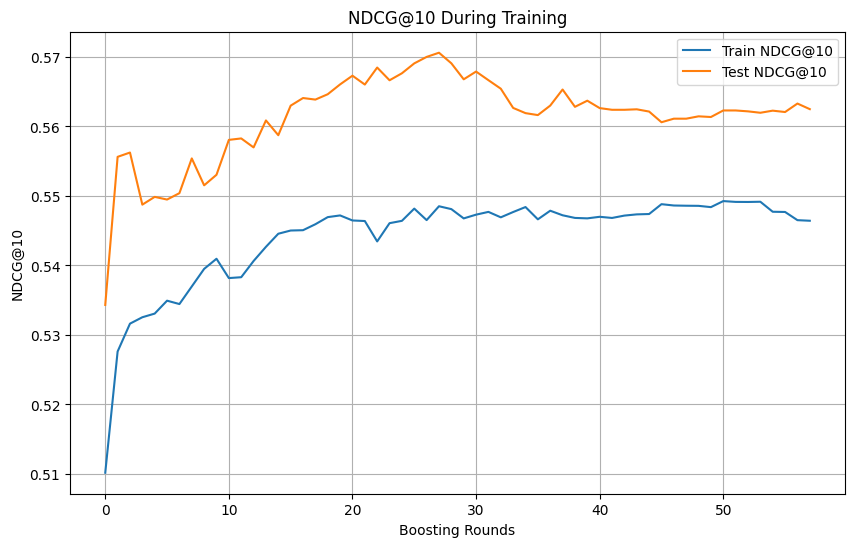

In [32]:
#开始训练 静态特征 lambda

import optuna
import lightgbm as lgb
import matplotlib.pyplot as plt

# 自定义评估记录回调
class RecordEvalCallback:
    def __init__(self):
        self.evals_result = {'train': {}, 'test': {}}

    def __call__(self, env):
        for data_name, eval_name, result, _ in env.evaluation_result_list:
            if eval_name not in self.evals_result[data_name]:
                self.evals_result[data_name][eval_name] = []
            self.evals_result[data_name][eval_name].append(result)

# 目标函数
def objective(trial):
    params = {
        'objective': 'lambdarank',
        'metric': 'ndcg',
        'boosting_type': 'gbdt',
        'ndcg_eval_at': [10],
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 16, 128),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'verbose': -1,
    }

    train_data = lgb.Dataset(X_train, label=y_train, group=groups_train)
    test_data = lgb.Dataset(X_test, label=y_test, group=groups_test, reference=train_data)

    eval_callback = RecordEvalCallback()

    model = lgb.train(
        params,
        train_data,
        num_boost_round=100,
        valid_sets=[train_data, test_data],
        valid_names=['train', 'test'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=10),
            lgb.log_evaluation(period=10),
            eval_callback,
        ],
    )

    best_ndcg_at_10 = max(eval_callback.evals_result['test']['ndcg@10'])
    return best_ndcg_at_10

# 开始超参数搜索
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 输出最佳参数
print("Best hyperparameters:", study.best_params)
print("Best NDCG@10:", study.best_value)

# 使用最佳参数重新训练模型
best_params = study.best_params
best_params.update({'objective': 'lambdarank', 'metric': 'ndcg', 'ndcg_eval_at': [10]})

train_data = lgb.Dataset(X_train, label=y_train, group=groups_train)
test_data = lgb.Dataset(X_test, label=y_test, group=groups_test, reference=train_data)

eval_callback = RecordEvalCallback()
model = lgb.train(
    best_params,
    train_data,
    num_boost_round=200,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'test'],
    callbacks=[
        lgb.log_evaluation(period=10),
        lgb.early_stopping(stopping_rounds=30),
        eval_callback,
    ],
)

# 保存最佳模型
model.save_model("lambda_mart_best_model_optuna.bin")
print("Best model saved.")

# 绘制 NDCG 曲线
plt.figure(figsize=(10, 6))
plt.plot(eval_callback.evals_result['train']['ndcg@10'], label='Train NDCG@10')
plt.plot(eval_callback.evals_result['test']['ndcg@10'], label='Test NDCG@10')
plt.xlabel('Boosting Rounds')
plt.ylabel('NDCG@10')
plt.title('NDCG@10 During Training')
plt.legend()
plt.grid(True)
plt.show()



In [36]:
#尝试单独输入 list of string 来使用模型打分 ， 静态特征部分



import pandas as pd

# 读取完整动漫数据
anime_data_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd_normal.csv"
anime_data = pd.read_csv(anime_data_path)

# 提取指定标题的特征
anime_titles = [
    'Kyoto Animation: Megane-hen', 'Odoroki Ban', 'Hyoutan', 'Telemonster', 'Doudou', 'a_caFe', 
    'Metamorphose', 'Zawazawa', 'Mormorando', 'Fantasy', 'Spectral Force Chronicle Divergence',
    'Kyoto Animation: Ajisai-hen', 'Kyoto Animation: Kasa-hen', 'Ehon Yose', 'Ten',
    'Kyoto Animation: Ikitaku Naru Omise-hen', 'Animation!', 'Kaitou Jigoma Ongaku-hen', 'Kiseki',
    'Fashion', 'Sarasoujuu no Hana no Iro', 'Shin Tenchi Souzou', 'Kage', 'Ki Renka',
    'Ai Sky Tree 21', 'Otoko to Onna to Inu', 'Memory of Red', 'Ninja Hattori-kun: Nin Nin Ninpo Enikki no Maki',
    'Baka Mukashibanashi Movie: Jijii Wars', 'Recorder', 'Calm', 'Kiseichuu no Ichiya',
    'Jungle Taitei Leo: Hon-o-ji', 'Requiem (ONA)', 'Shigeru', 'Tokai no Butchy', 'Ai', 'Mado',
    'Futa-bu! Mix: Futanari World', 'Taku Boda', 'The Gakuen Choujo-tai', 'Calligraffiti',
    'Yaiyai Mori no Comic', 'Hokuro Kyoudai Full Throttle!!!!', 'Color Noise', 'Umi Da! Funade Da! Nikoniko, Pun',
    'Tsuiseki', 'Jikan', 'Sensuikan Cassiopeia', 'Scripta Volant', 'Hakuchuu Meikyuu', 'Landmark',
    'Aya Hito Shiki to Iu na no Ishi Hata', 'Rurouni Kenshin: Meiji Kenkaku Romantan - Shin Kyoto-hen',
    'Kizuna (Special)', 'Bokutachi no Peace River', 'Chanda Gou', 'Futari Zamurai Homare no Kawakiri',
    'Petit Manga', 'Paper Film', 'Nani ga Dekiru ka na', 'Yakusoku', 'Hana no Hanashi', 
    'Arigatou Gomennasai', 'Teddy', 'Kuripuri*Kuripura', 'Joukyou Monogatari', 'Rule', 'Murder',
    'Crayon Shin-chan Movie 04: Henderland no Daibouken', 'Poron Guitar', 'Kitsutsuki Keikaku', 
    'Ojiichan ga Kaizoku Datta Koro', 'Fushigi na Kusuri', 'Manyuu Hikenchou Specials', 'Itsumademo Tabibito',
    'Manga', 'G-senjou no Higeki', 'Seishun Anime Zenshuu', 'Miss Monochrome: Music Clips', 'Wheels',
    'Kimi ni Maji Kyun!', 'Tsuru no Ongaeshi', 'King of Prism by Pretty Rhythm Short Anime', 'Yowamushi Monsters',
    'Dreams', 'Sangokushi (1985)', 'Korekarasaki, Nando Anata to.', 'Sin: Nanatsu no Taizai Zange-roku',
    'Kaze no Kokyuu: Animation ni Yoru Oufuku Shokan', 'Kaguya-hime', 'Francesca', 'Nido to Mezamenu Komori Uta',
    'Ninja Hattori-kun (2012)', 'Manga Nihon Emaki', 'Suijungenten\u200b', 'Umi kara no Shisha', 
    'Ao Oni The Animation (Movie)', 'Stone', 'Neo Satomi Hakkenden: Satomi-chanchi no Hachi Danshi'
]

# 筛选标题对应的特征
filtered_anime_data = anime_data[anime_data['title'].isin(anime_titles)]


# 加载训练好的模型
model_path = "lambda_mart_best_model_optuna.bin"
model = lgb.Booster(model_file=model_path)

# 特征列
features = ["score", "rank_normalized", "popularity_log", "favorites_log", "scored_by_log", "members_log"]

# 预测静态评分
filtered_anime_features = filtered_anime_data[features]
static_scores = model.predict(filtered_anime_features)

# 添加评分到数据框
filtered_anime_data['static_score'] = static_scores

# 按照评分降序排序
sorted_anime_data = filtered_anime_data.sort_values(by='static_score', ascending=False)

# 打印前 10 部动漫
print(sorted_anime_data[['title', 'static_score']].head(100))


                                                   title  static_score
5900   Rurouni Kenshin: Meiji Kenkaku Romantan - Shin...     -0.419620
4854   Crayon Shin-chan Movie 04: Henderland no Daibo...     -0.433543
10520                                      Suijungenten​     -0.434631
9146                                         Kaguya-hime     -0.461545
9450                        Futa-bu! Mix: Futanari World     -0.493133
...                                                  ...           ...
8778                                              Dreams     -0.533547
8665                                           Ehon Yose     -0.533547
8000                                       Calligraffiti     -0.533547
7749                                              a_caFe     -0.533547
9019                                               Stone     -0.533547

[100 rows x 2 columns]


C:\Users\15023\AppData\Local\Temp\ipykernel_359176\673878479.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_anime_data['static_score'] = static_scores


In [41]:
#尝试动态query 部分打分

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import ast

# 加载数据
file_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd_normal.csv"
data = pd.read_csv(file_path)

# 查询关键词
query = "I want something like Demon Slayer, but with more romance and produced by Kyoto Animation"

# 初始化预训练的 SentenceTransformer 模型
model = SentenceTransformer('all-MiniLM-L6-v2')

# 计算查询的嵌入
query_embedding = model.encode([query])

# 修复数据格式
def parse_embedding(embedding_str):
    """修复并解析嵌入向量的格式"""
    try:
        # 安全解析嵌入
        return ast.literal_eval(embedding_str)
    except (ValueError, SyntaxError):
        # 如果解析失败，尝试修复格式
        cleaned_str = embedding_str.replace("\n", "").replace(" ", ",").replace(",,", ",").strip("[]")
        try:
            return [float(x) for x in cleaned_str.split(",")]
        except ValueError:
            # 如果仍然失败，返回空列表或默认值
            return []

print("Parsing existing embeddings...")

# 修复并解析嵌入列
data['title_embedding'] = data['title_embedding'].apply(parse_embedding)
data['synopsis_embedding'] = data['synopsis_embedding'].apply(parse_embedding)
data['producers_embedding'] = data['producers_embedding'].apply(parse_embedding)
data['studios_embedding'] = data['studios_embedding'].apply(parse_embedding)

# Step 1: 计算标题与 Synopsis 的相似度
print("Calculating title and synopsis similarities...")

# 计算与 title 的相似度
data['title_similarity'] = data['title_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

# 计算与 synopsis 的相似度
data['synopsis_similarity'] = data['synopsis_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

# Step 2: 计算制片人和工作室的相似度
print("Calculating producers and studios similarities...")

# 计算与 producers 的相似度
data['producers_similarity'] = data['producers_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

# 计算与 studios 的相似度
data['studios_similarity'] = data['studios_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

# Step 3: 计算类别相关性
print("Calculating genre similarity...")

genre_columns = [
    'Demons', 'Romance', 'Action', 'Adventure', 'Avant Garde', 'Award Winning',
    'Boys Love', 'Cars', 'Comedy', 'Dementia', 'Drama', 'Ecchi', 'Erotica',
    'Fantasy', 'Game', 'Girls Love', 'Gourmet', 'Harem', 'Hentai', 'Historical',
    'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
    'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Samurai', 'School',
    'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space', 'Sports',
    'Super Power', 'Supernatural', 'Suspense', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'
]

def calculate_genre_similarity(row, query):
    query_lower = query.lower()
    matches = sum([1 for genre in genre_columns if genre.lower() in query_lower and row.get(genre, 0) == 1])
    return matches / len(genre_columns)

data['genre_similarity'] = data.apply(lambda row: calculate_genre_similarity(row, query), axis=1)

# Step 4: 综合评分
print("Combining all similarity scores...")

data['dynamic_score'] = (
    0.3 * data['title_similarity'] +
    0.3 * data['synopsis_similarity'] +
    0.2 * data['producers_similarity'] +
    0.1 * data['studios_similarity'] +
    0.1 * data['genre_similarity']
)

# 排序并显示结果
data = data.sort_values(by='dynamic_score', ascending=False)
print(data[['title', 'dynamic_score']].head(10))







Parsing existing embeddings...
Calculating title and synopsis similarities...
Calculating producers and studios similarities...
Calculating genre similarity...
Combining all similarity scores...
                                                   title  dynamic_score
6261                         Kyoto Animation: Ajisai-hen       0.506756
6977                         Kyoto Animation: Megane-hen       0.503289
6978                           Kyoto Animation: Kasa-hen       0.500900
6979                          Kyoto Animation: Suiei-hen       0.469093
6975             Kyoto Animation: Ikitaku Naru Omise-hen       0.411038
488                    Ayakashi: Japanese Classic Horror       0.401124
7179                            Ninja Hattori-kun (2012)       0.381855
12184  Kyoto Animation Koushiki Twitter: Itsumo Arigatou       0.374909
5203           Chibi Maruko-chan: Watashi no Suki na Uta       0.373832
4824          SD Gundam Sangokuden Brave Battle Warriors       0.373711


In [49]:

#动态评分，静态评分结合


import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import lightgbm as lgb
import ast

# 加载完整数据
anime_data_path = "C:/Users/15023/Desktop/IR/Project/user_data/final_anime_list_cleaned_3rd_normal.csv"
anime_data = pd.read_csv(anime_data_path)

# 查询关键词和动漫标题
query = "I want something like Demon Slayer, but with more romance and produced by Kyoto Animation"
#query = "Rurouni Kenshin"
anime_titles = [
    'Kyoto Animation: Megane-hen', 'Odoroki Ban', 'Hyoutan', 'Telemonster', 'Doudou', 'a_caFe', 
    'Metamorphose', 'Zawazawa', 'Mormorando', 'Fantasy', 'Spectral Force Chronicle Divergence',
    'Kyoto Animation: Ajisai-hen', 'Kyoto Animation: Kasa-hen', 'Ehon Yose', 'Ten',
    'Kyoto Animation: Ikitaku Naru Omise-hen', 'Animation!', 'Kaitou Jigoma Ongaku-hen', 'Kiseki',
    'Fashion', 'Sarasoujuu no Hana no Iro', 'Shin Tenchi Souzou', 'Kage', 'Ki Renka',
    'Ai Sky Tree 21', 'Otoko to Onna to Inu', 'Memory of Red', 'Ninja Hattori-kun: Nin Nin Ninpo Enikki no Maki',
    'Baka Mukashibanashi Movie: Jijii Wars', 'Recorder', 'Calm', 'Kiseichuu no Ichiya',
    'Jungle Taitei Leo: Hon-o-ji', 'Requiem (ONA)', 'Shigeru', 'Tokai no Butchy', 'Ai', 'Mado',
    'Futa-bu! Mix: Futanari World', 'Taku Boda', 'The Gakuen Choujo-tai', 'Calligraffiti',
    'Yaiyai Mori no Comic', 'Hokuro Kyoudai Full Throttle!!!!', 'Color Noise', 'Umi Da! Funade Da! Nikoniko, Pun',
    'Tsuiseki', 'Jikan', 'Sensuikan Cassiopeia', 'Scripta Volant', 'Hakuchuu Meikyuu', 'Landmark',
    'Aya Hito Shiki to Iu na no Ishi Hata', 'Rurouni Kenshin: Meiji Kenkaku Romantan - Shin Kyoto-hen',
    'Kizuna (Special)', 'Bokutachi no Peace River', 'Chanda Gou', 'Futari Zamurai Homare no Kawakiri',
    'Petit Manga', 'Paper Film', 'Nani ga Dekiru ka na', 'Yakusoku', 'Hana no Hanashi', 
    'Arigatou Gomennasai', 'Teddy', 'Kuripuri*Kuripura', 'Joukyou Monogatari', 'Rule', 'Murder',
    'Crayon Shin-chan Movie 04: Henderland no Daibouken', 'Poron Guitar', 'Kitsutsuki Keikaku', 
    'Ojiichan ga Kaizoku Datta Koro', 'Fushigi na Kusuri', 'Manyuu Hikenchou Specials', 'Itsumademo Tabibito',
    'Manga', 'G-senjou no Higeki', 'Seishun Anime Zenshuu', 'Miss Monochrome: Music Clips', 'Wheels',
    'Kimi ni Maji Kyun!', 'Tsuru no Ongaeshi', 'King of Prism by Pretty Rhythm Short Anime', 'Yowamushi Monsters',
    'Dreams', 'Sangokushi (1985)', 'Korekarasaki, Nando Anata to.', 'Sin: Nanatsu no Taizai Zange-roku',
    'Kaze no Kokyuu: Animation ni Yoru Oufuku Shokan', 'Kaguya-hime', 'Francesca', 'Nido to Mezamenu Komori Uta',
    'Ninja Hattori-kun (2012)', 'Manga Nihon Emaki', 'Suijungenten\u200b', 'Umi kara no Shisha', 
    'Ao Oni The Animation (Movie)', 'Stone', 'Neo Satomi Hakkenden: Satomi-chanchi no Hachi Danshi'
]

# 筛选标题对应的特征
filtered_anime_data = anime_data[anime_data['title'].isin(anime_titles)].copy()

# 加载训练好的模型
model_path = "lambda_mart_best_model_optuna.bin"
model = lgb.Booster(model_file=model_path)

# 特征列
features = ["score", "rank_normalized", "popularity_log", "favorites_log", "scored_by_log", "members_log"]

# 预测静态评分
filtered_anime_features = filtered_anime_data[features]
static_scores = model.predict(filtered_anime_features)

# 添加静态评分到数据框
filtered_anime_data.loc[:, 'static_score'] = static_scores

# 初始化 SentenceTransformer 模型
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
query_embedding = sentence_model.encode([query])

# 修复嵌入格式的函数
def parse_embedding(embedding_str):
    """修复并解析嵌入向量的格式"""
    if not isinstance(embedding_str, str) or embedding_str.strip() == "":
        return []
    try:
        return ast.literal_eval(embedding_str)
    except (ValueError, SyntaxError):
        cleaned_str = embedding_str.replace("\n", "").replace(" ", ",").replace(",,", ",").strip("[]")
        try:
            return [float(x) for x in cleaned_str.split(",") if x.strip() != ""]
        except ValueError:
            return []

# 修复嵌入列
filtered_anime_data.loc[:, 'title_embedding'] = filtered_anime_data['title_embedding'].apply(parse_embedding)
filtered_anime_data.loc[:, 'synopsis_embedding'] = filtered_anime_data['synopsis_embedding'].apply(parse_embedding)
filtered_anime_data.loc[:, 'producers_embedding'] = filtered_anime_data['producers_embedding'].apply(parse_embedding)
filtered_anime_data.loc[:, 'studios_embedding'] = filtered_anime_data['studios_embedding'].apply(parse_embedding)

# 动态评分计算：标题与简介相似度
filtered_anime_data.loc[:, 'title_similarity'] = filtered_anime_data['title_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

filtered_anime_data.loc[:, 'synopsis_similarity'] = filtered_anime_data['synopsis_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

# 动态评分计算：制片人与工作室相似度
filtered_anime_data.loc[:, 'producers_similarity'] = filtered_anime_data['producers_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

filtered_anime_data.loc[:, 'studios_similarity'] = filtered_anime_data['studios_embedding'].apply(
    lambda x: cosine_similarity([x], query_embedding)[0][0] if len(x) > 0 else 0
)

# 计算类别相关性
genre_columns = [
    'Demons', 'Romance', 'Action', 'Adventure', 'Avant Garde', 'Award Winning',
    'Boys Love', 'Cars', 'Comedy', 'Dementia', 'Drama', 'Ecchi', 'Erotica',
    'Fantasy', 'Game', 'Girls Love', 'Gourmet', 'Harem', 'Hentai', 'Historical',
    'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
    'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Samurai', 'School',
    'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space', 'Sports',
    'Super Power', 'Supernatural', 'Suspense', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'
]

def calculate_genre_similarity(row, query):
    query_lower = query.lower()
    matches = sum([1 for genre in genre_columns if genre.lower() in query_lower and row.get(genre, 0) == 1])
    return matches / len(genre_columns)

filtered_anime_data.loc[:, 'genre_similarity'] = filtered_anime_data.apply(
    lambda row: calculate_genre_similarity(row, query), axis=1
)

# 动态评分综合计算
filtered_anime_data.loc[:, 'dynamic_score'] = (
    0.4 * filtered_anime_data['title_similarity'] +
    0.2 * filtered_anime_data['synopsis_similarity'] +
    0.1 * filtered_anime_data['producers_similarity'] +
    0.1 * filtered_anime_data['studios_similarity'] +
    0.2 * filtered_anime_data['genre_similarity']
)

# 最终综合评分
filtered_anime_data.loc[:, 'final_score'] = (
    0.7 * filtered_anime_data['dynamic_score'] + 0.3 * filtered_anime_data['static_score']
)

# 按最终得分排序
sorted_anime_data = filtered_anime_data.sort_values(by='final_score', ascending=False)

# 打印结果
print(sorted_anime_data[['title', 'static_score', 'dynamic_score', 'final_score']].head(10))


                                                   title  static_score  \
6978                           Kyoto Animation: Kasa-hen     -0.495937   
6261                         Kyoto Animation: Ajisai-hen     -0.523366   
6977                         Kyoto Animation: Megane-hen     -0.523321   
6975             Kyoto Animation: Ikitaku Naru Omise-hen     -0.523366   
4854   Crayon Shin-chan Movie 04: Henderland no Daibo...     -0.433543   
5900   Rurouni Kenshin: Meiji Kenkaku Romantan - Shin...     -0.419620   
3472                               Seishun Anime Zenshuu     -0.525787   
7179                            Ninja Hattori-kun (2012)     -0.531347   
9377                                  Joukyou Monogatari     -0.533547   
10363         King of Prism by Pretty Rhythm Short Anime     -0.531347   

       dynamic_score  final_score  
6978        0.459180     0.172645  
6261        0.465036     0.168515  
6977        0.461569     0.166102  
6975        0.426972     0.141870  
4854 